# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

In [12]:
import pandas as pd
df = pd.read_excel('engajamento.xlsx')
df = df.drop("Visualizações", axis=1)
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


## Verificando Valores Nulos

In [ ]:
df.loc[df["Carrossel"].isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [23]:
df.loc[df["Carrossel"].isnull(), "Carrossel"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Carrossel, dtype: object

In [ ]:
df.loc[df["Carrossel"].isnull(), "Carrossel"] = "N"
df.loc[df["Carrossel"].isnull(), "Carrossel"].head()

Carrossel
N    44
S     8
Name: count, dtype: int64

## Informações Estatísticas

In [32]:
df.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


## Visualizando de Maneira Gráfica

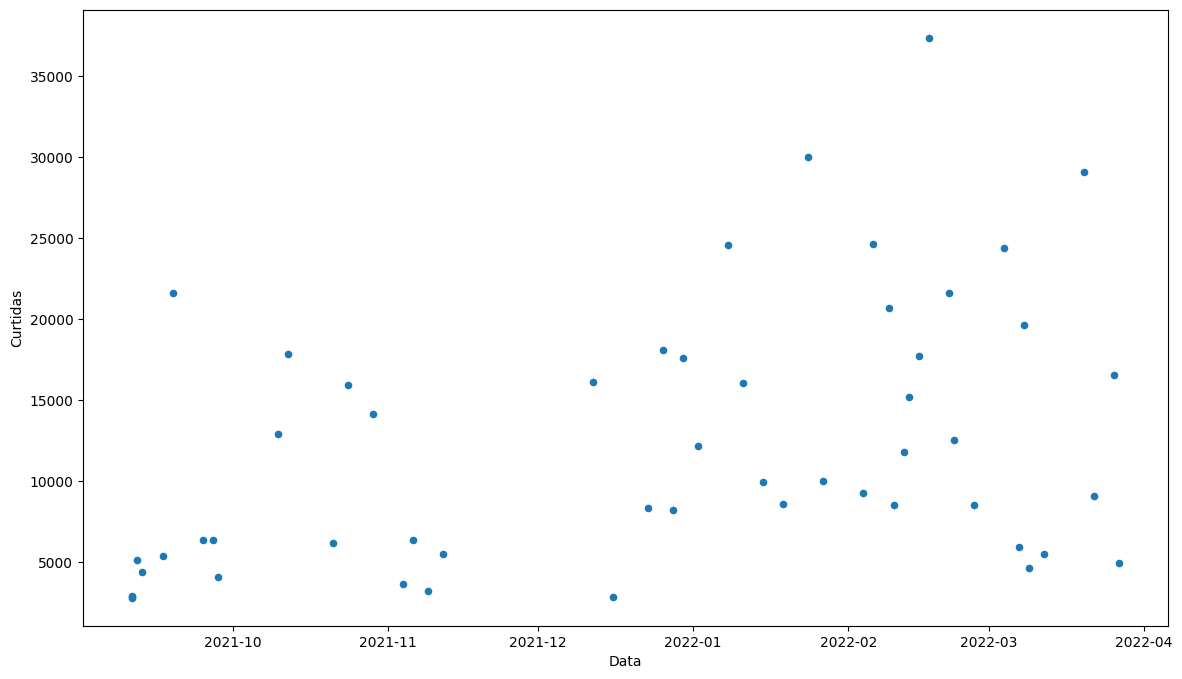

In [34]:
df.plot(kind="scatter", x="Data", y="Curtidas", figsize=(14, 8));

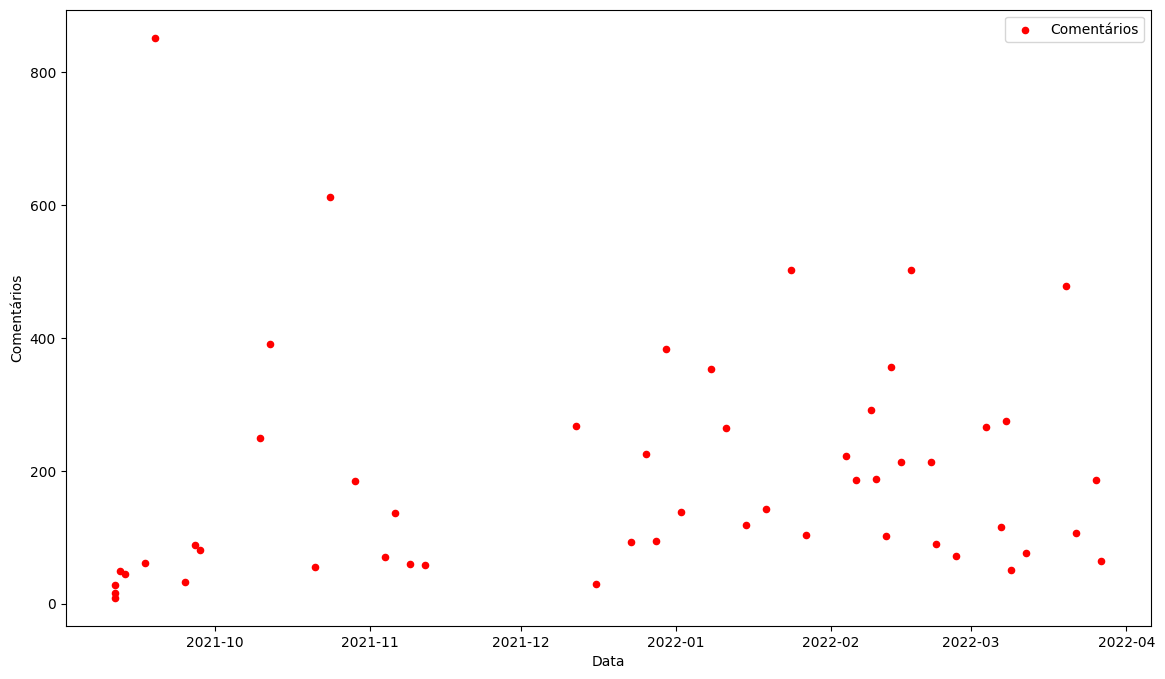

In [45]:
df.plot(kind="scatter", x="Data", y="Comentários", label="Comentários", color="red", figsize=(14, 8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

In [56]:
df.sort_values(by="Curtidas", ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [58]:
df.sort_values(by="Curtidas", ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

In [63]:
# Melhorando a Visualização dos Dados
pd.options.display.float_format = '{:,.2f}'.format

In [64]:
df.groupby("Tipo")["Curtidas"].mean()

Tipo
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Curtidas, dtype: float64

In [71]:
df.groupby(["Tipo", "Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

In [72]:
df.groupby("Pessoas")[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [73]:
df.groupby("Campanhas")[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [83]:
df[df["Tipo"] == "Foto"].groupby(["Carrossel"])[["Curtidas", "Comentários"]].mean()


,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

In [84]:
df.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [85]:
df.groupby(["Pessoas","Campanhas","Tipo"])[["Curtidas","Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

- Sobre Vídeos, o que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

In [86]:
df[df.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**